In [1]:
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv('/home/mitalideshpande/Movie-Ratings.csv')

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ['Film', 'Genre', 'CriticsRatings', 'AudienceRatings',
       'BudgetMillions', 'ReleaseYear']

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
ReleaseYear        559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [12]:
# Convert variables into categorial variables
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.ReleaseYear = movies.ReleaseYear.astype('category')

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
ReleaseYear        559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


In [26]:
# Creating plots 
# Jointplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

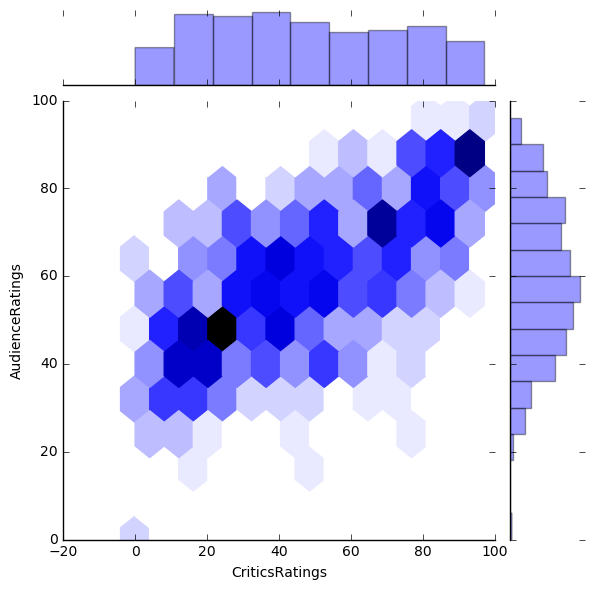

In [27]:
jt = sns.jointplot(data=movies, x='CriticsRatings', y='AudienceRatings', kind='hex')

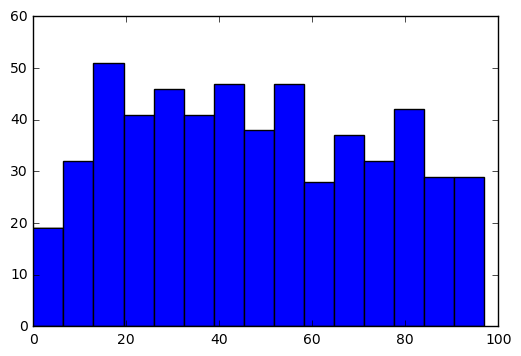

In [30]:
h1 = plt.hist(movies.CriticsRatings, bins=15)

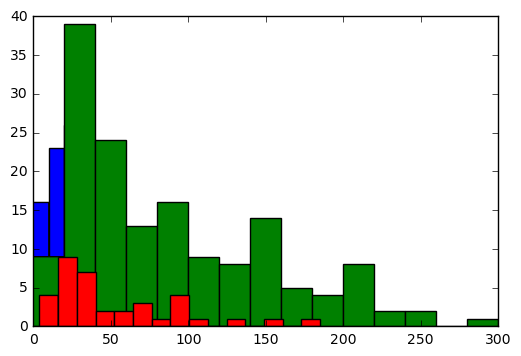

In [41]:
#Stacked Histograms
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

In [37]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

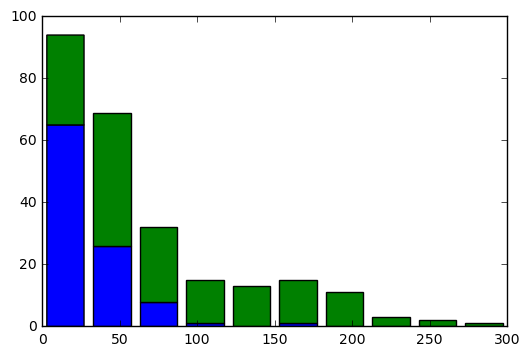

In [45]:
# adding all genres in list
list1 = [movies[movies.Genre == 'Drama'].BudgetMillions , movies[movies.Genre == 'Action'].BudgetMillions]
plt.hist(list1, bins=10, stacked=True)
plt.show()

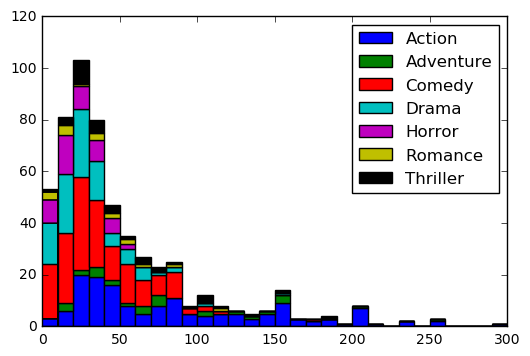

In [56]:
# instead of manually typing we can loop over the categories
list_gen = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list_gen.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
plt.hist(list_gen, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()